<a href="https://colab.research.google.com/github/dhgrassi/Grupo-de-Estudos-DS/blob/main/kNN_Insumo_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LIBRARIES IMPORT, SKTIME AND STATSMODELS INSTALLING AND DATASET IMPORT

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import pandas as pd
from scipy import stats
from scipy.stats import norm
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
from sktime.utils.plotting import plot_series
from sklearn.metrics import mean_absolute_error
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

In [ ]:
!pip install statsmodels  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 3.7 MB/s 
     |████████████████████████████████| 9.8 MB 49.2 MB/s 
     |████████████████████████████████| 3.3 MB 37.2 MB/s 
     |████████████████████████████████| 34.5 MB 6.6 kB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2


In [ ]:
#Dataset import
from google.colab import files
uploaded = files.upload()

Saving Insumo 9 - FH 3h.xlsx to Insumo 9 - FH 3h.xlsx


BASICS OF THE TIME SERIES

In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Insumo 9 - FH 3h.xlsx']))
df

,Data,Nível Insumo 9 (%)
0,2020-01-01 00:00:00,59.736069
1,2020-01-01 03:00:00,51.016441
2,2020-01-01 06:00:00,42.485916
3,2020-01-01 09:00:00,42.107887
4,2020-01-01 12:00:00,37.09317
...,...,...
7051,2022-05-31 09:00:00,51.659706
7052,2022-05-31 12:00:00,51.084957
7053,2022-05-31 15:00:00,48.949753
7054,2022-05-31 18:00:00,45.225914


In [ ]:
#Setting date as the index
df.set_index('Data', inplace=True, drop=True)

In [ ]:
#Checking if data is the index
df.head()

,Nível Insumo 9 (%)
Data,
2020-01-01 00:00:00,59.736069
2020-01-01 03:00:00,51.016441
2020-01-01 06:00:00,42.485916
2020-01-01 09:00:00,42.107887
2020-01-01 12:00:00,37.09317


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7056 entries, 2020-01-01 00:00:00 to 2022-05-31 21:00:00
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Nível Insumo 9 (%)  7056 non-null   object
dtypes: object(1)
memory usage: 110.2+ KB


PRE-PROCESSING

In [ ]:
#Nível Insumo 9 column has non numeric values
#list of non real values
nans = df[~df.applymap(np.isreal).all(1)]
nans

,Nível Insumo 9 (%)
Data,
2020-04-14 15:00:00,Bad
2020-04-14 18:00:00,Bad
2021-03-31 09:00:00,Bad
2021-03-31 12:00:00,Bad


In [ ]:
#transforming strings in Nan
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
#filling Nan values with previous valid number
#df.fillna(method="ffill", inplace="true")
df = df.fillna(df.mean())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7056 entries, 2020-01-01 00:00:00 to 2022-05-31 21:00:00
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nível Insumo 9 (%)  7056 non-null   float64
dtypes: float64(1)
memory usage: 110.2 KB


<Figure size 1728x288 with 0 Axes>

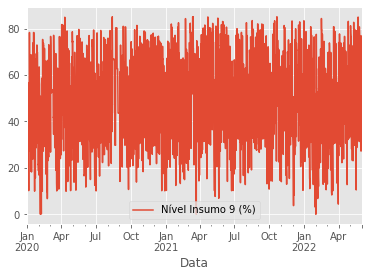

In [ ]:
import matplotlib
matplotlib.style.use('ggplot')
plt.figure(figsize=(24,4)) 
df.plot()

Text(0.5, 1.0, 'Insumo 9')

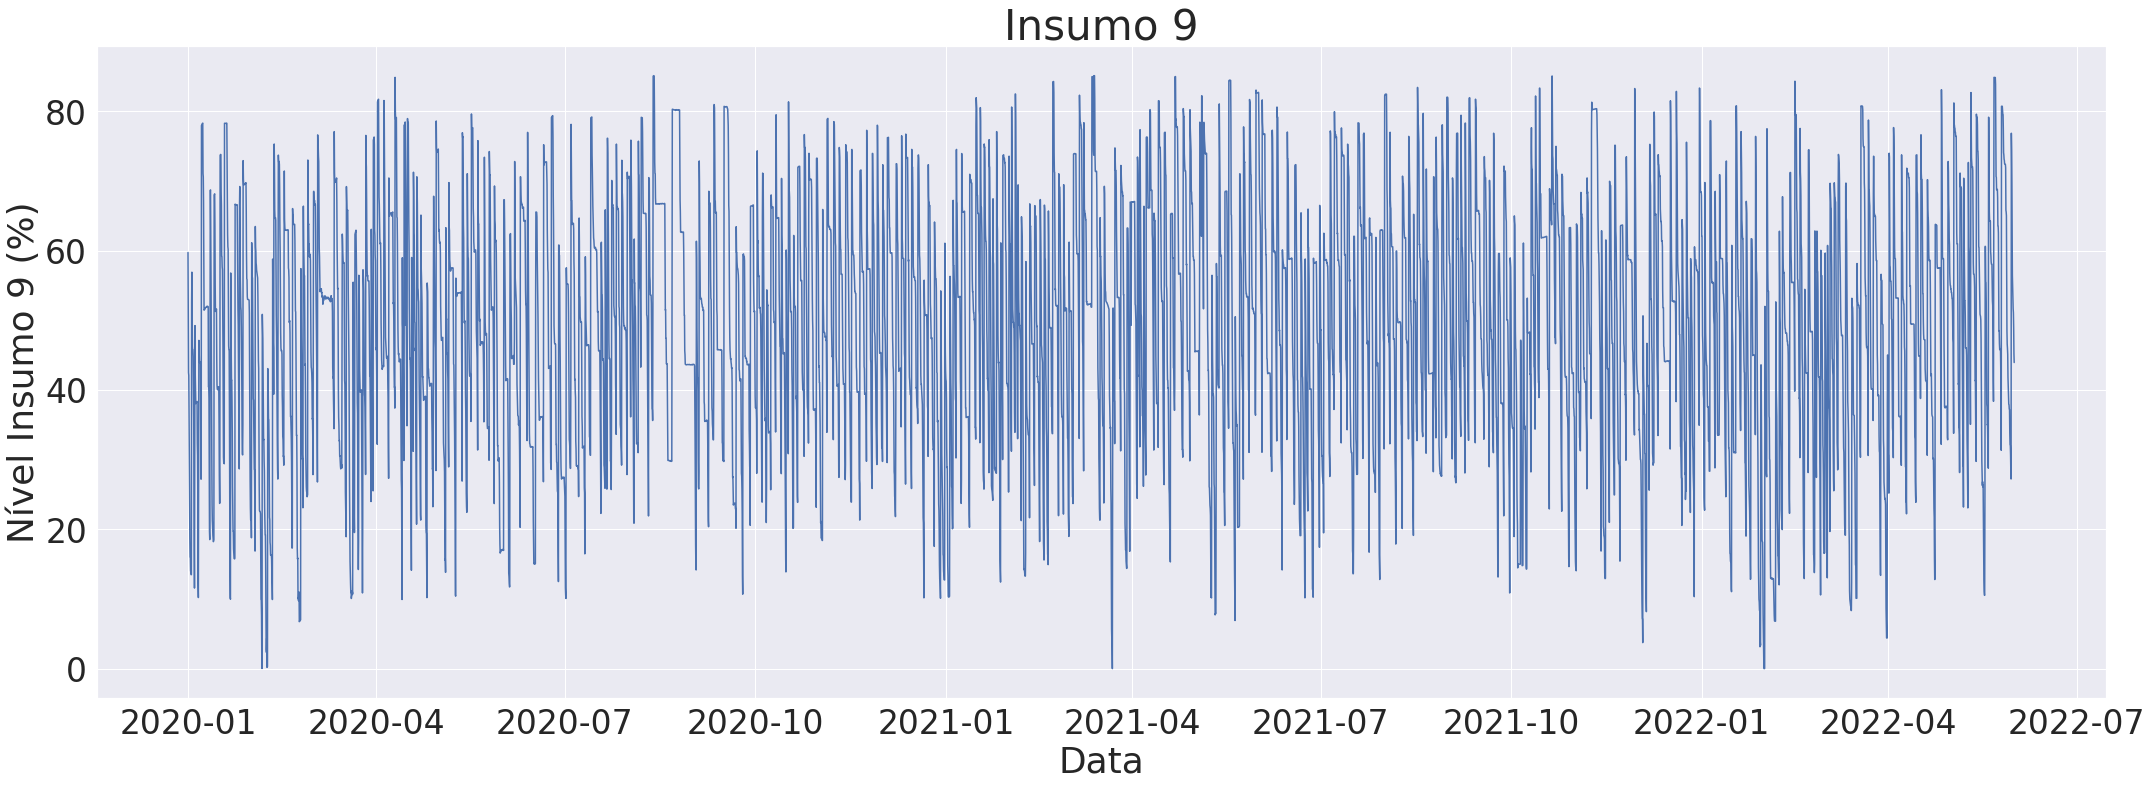

In [ ]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(36, 12)

# Setting the font scale
sns.set(font_scale=3)
sns.lineplot(x='Data', 
                y='Nível Insumo 9 (%)', 
                data=df)
plt.title("Insumo 9", fontsize=42)

PASSING FREQUENCY AND SPLITTING IN TRAIN/TEST

In [ ]:
#First we need to ensure DF frequency is 3H
df = df.resample('3H').mean() 

In [ ]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon

In [ ]:
y = df
y_train, y_test = temporal_train_test_split(y, test_size=240)
# we will try to forecast y_test from y_train

NameError: ignored

6816 240


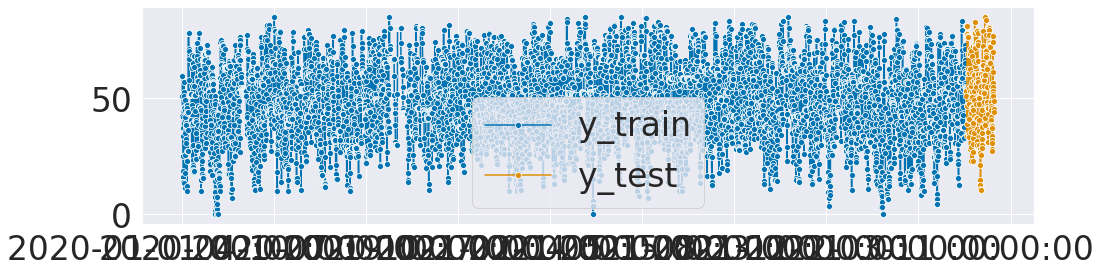

In [ ]:
# plotting for illustration
plot_series(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

In [ ]:
# we can simply take the indices from `y_test` where they already are stored
fh = ForecastingHorizon(y_test.index, is_relative=False)
fh

ForecastingHorizon(['2022-05-02 00:00:00', '2022-05-02 03:00:00',
               '2022-05-02 06:00:00', '2022-05-02 09:00:00',
               '2022-05-02 12:00:00', '2022-05-02 15:00:00',
               '2022-05-02 18:00:00', '2022-05-02 21:00:00',
               '2022-05-03 00:00:00', '2022-05-03 03:00:00',
               ...
               '2022-05-30 18:00:00', '2022-05-30 21:00:00',
               '2022-05-31 00:00:00', '2022-05-31 03:00:00',
               '2022-05-31 06:00:00', '2022-05-31 09:00:00',
               '2022-05-31 12:00:00', '2022-05-31 15:00:00',
               '2022-05-31 18:00:00', '2022-05-31 21:00:00'],
              dtype='datetime64[ns]', length=240, freq='3H', is_relative=False)

/usr/local/lib/python3.7/dist-packages/sktime/forecasting/base/_fh.py:601: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if not hasattr(cutoff, "freqstr") or cutoff.freqstr is None:
/usr/local/lib/python3.7/dist-packages/sktime/forecasting/base/_fh.py:611: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  assert cutoff.freqstr == index.freqstr
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:80: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if hasattr(x, "freqstr"):
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:81: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if x.freqstr is None:
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:83: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  elif "-" in x.freqstr:
/usr/local/lib/python3.7/

19.711086955935233

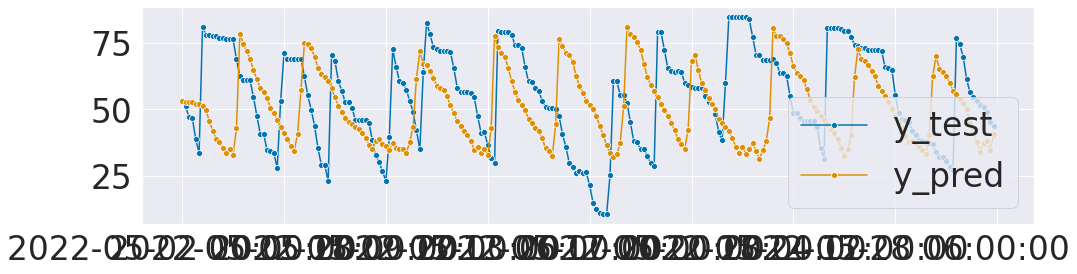

In [ ]:
from sklearn.neighbors import KNeighborsRegressor 
from sktime.forecasting.compose import make_reduction 
regressor = KNeighborsRegressor(n_neighbors=12) 
forecaster = make_reduction(regressor, window_length=3, strategy="recursive") 
forecaster.fit(y_train) 
y_pred = forecaster.predict(fh) 
plot_series(y_test, y_pred, labels=["y_test", "y_pred"])
mean_absolute_error(y_pred, y_test)

In [ ]:
df_2week = y.tail(32)
df_2week

,Nível Insumo 9 (%)
Data,
2022-05-28 00:00:00,65.558685
2022-05-28 03:00:00,65.007385
2022-05-28 06:00:00,55.460171
2022-05-28 09:00:00,48.498775
2022-05-28 12:00:00,46.585091
2022-05-28 15:00:00,45.984768
2022-05-28 18:00:00,45.103298
2022-05-28 21:00:00,41.813004
2022-05-29 00:00:00,40.454548


In [ ]:
import numpy as np
fh = np.arange(1, 32)
fh

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:108: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  if not hasattr(x, "freq") or x.freq is None:
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:110: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  by *= x.freq
/usr/local/lib/python3.7/dist-packages/sktime/forecasting/base/_fh.py:565: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  cutoff = _coerce_to_period(cutoff, freq=cutoff.freqstr)


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f082c14e8d0>)

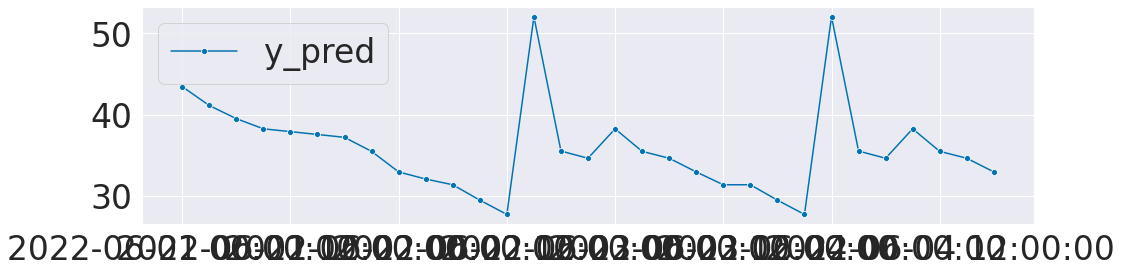

In [ ]:
regressor = KNeighborsRegressor(n_neighbors=2) 
forecaster = make_reduction(regressor, window_length=3, strategy="recursive") 
forecaster.fit(df_2week) 
y_pred_5days = forecaster.predict(fh) 
plot_series(y_pred_5days, labels=["y_pred"])

In [ ]:
y_pred_5days

,Nível Insumo 9 (%)
2022-06-01 00:00:00,43.458151
2022-06-01 03:00:00,41.133776
2022-06-01 06:00:00,39.519384
2022-06-01 09:00:00,38.268284
2022-06-01 12:00:00,37.923845
2022-06-01 15:00:00,37.576113
2022-06-01 18:00:00,37.218779
2022-06-01 21:00:00,35.500711
2022-06-02 00:00:00,32.974482
2022-06-02 03:00:00,32.099682
